# EDA

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import kstest, weibull_min, expon, gamma

In [2]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

sns.set_style("whitegrid")

## Analysis

In [3]:
train = pd.read_parquet("../data/raw/train.parquet")
test = pd.read_parquet("../data/raw/test.parquet")

Data was generated by me, so there are no missing values nor incorrect encoding. Let's only ensure that there are no duplicated values.

In [4]:
train.duplicated().sum()

0

Let's generate boxplots and histograms for our data.

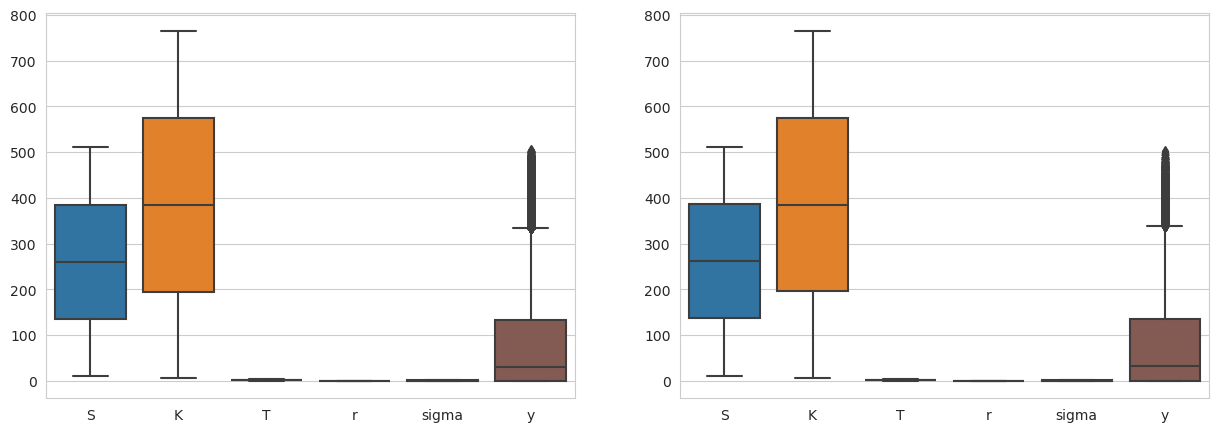

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(train, ax=ax[0])
sns.boxplot(test, ax=ax[1])
plt.show()

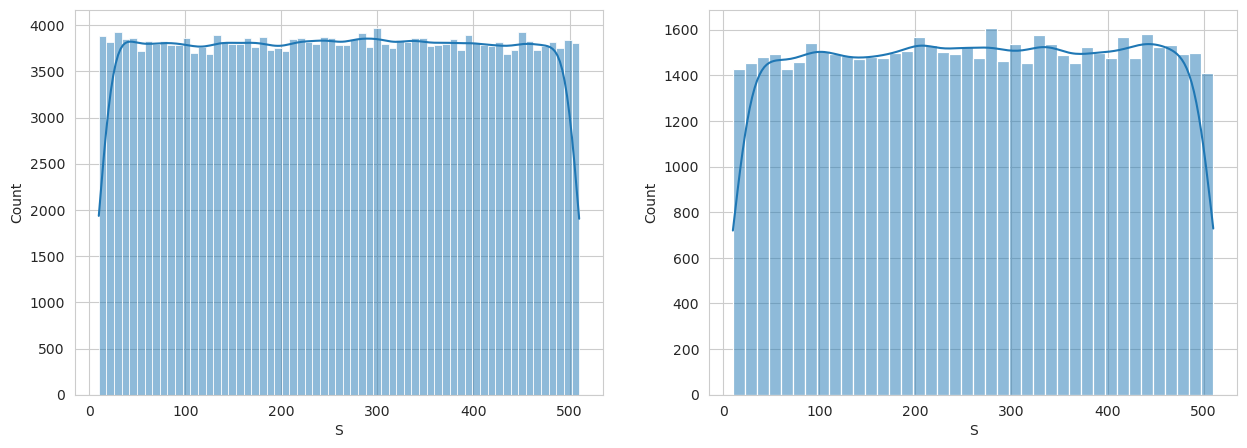

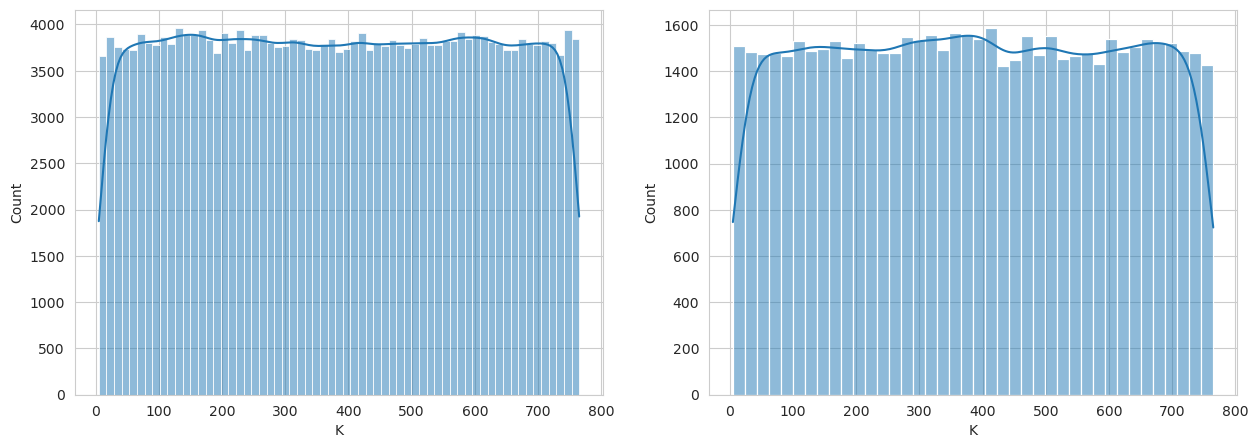

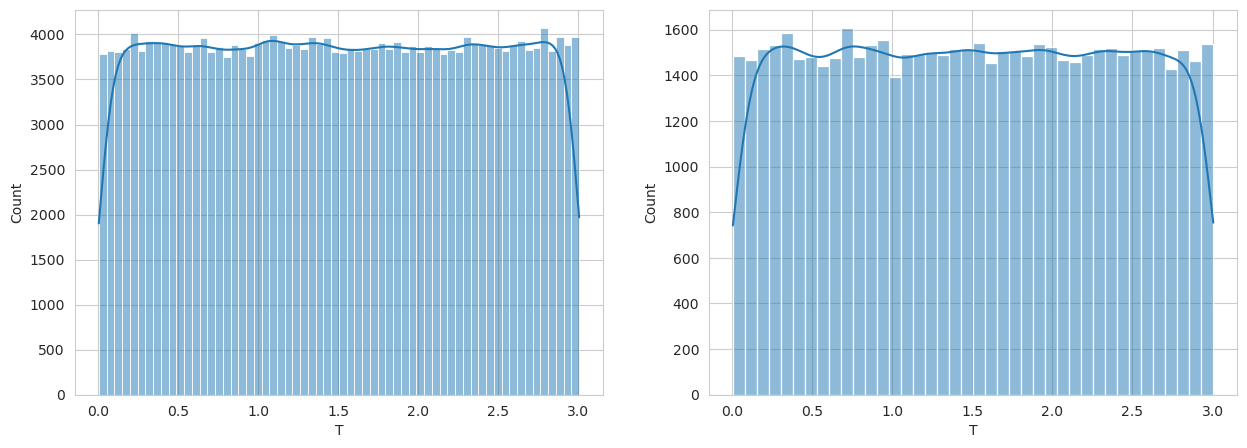

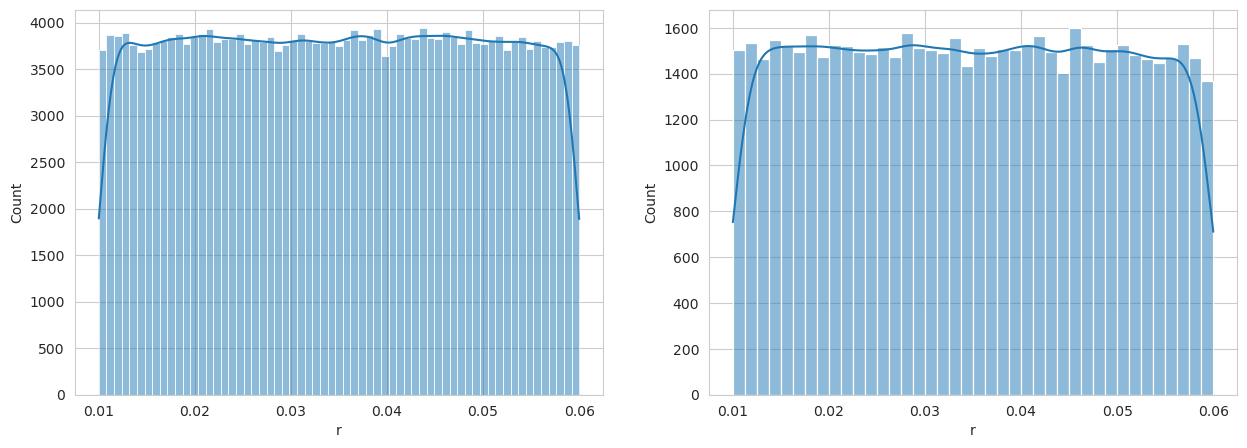

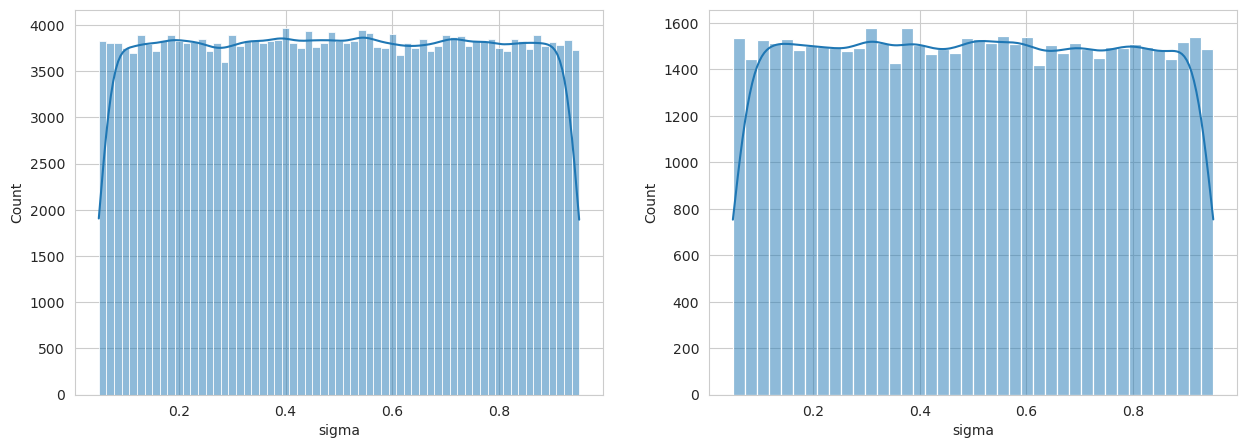

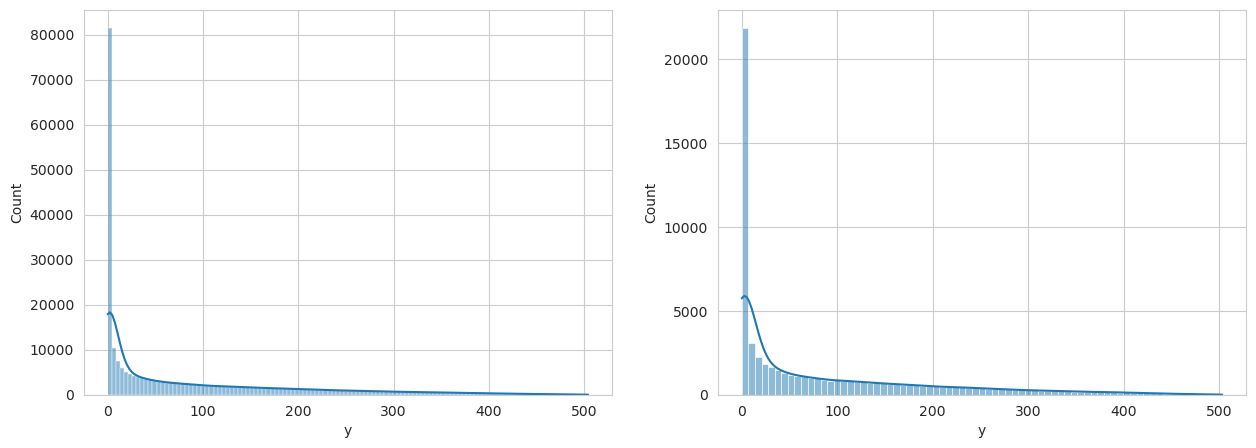

In [6]:
for col in train.columns:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(train[col], ax=ax[0], kde=True)
    sns.histplot(test[col], ax=ax[1], kde=True)
    plt.show()

The data needs preprocessing &mdash; the scale of inputs differs significantly in some cases.

Let's check if the option prices are given by some distribution. 

In [7]:
def check_distribution(data, dist, alpha=0.05):
    """Check if data fits a distribution using the Kolmogorov-Smirnov test."""
    dist_fitted_params = dist.fit(data)
    dist_fitted = dist(*dist_fitted_params)
    res = kstest(data, dist_fitted.cdf)
    return res.pvalue > alpha

In [8]:
for dist in [expon, gamma, weibull_min]:
    print(dist.name, check_distribution(train["y"], dist))

expon False
gamma False
weibull_min False


The distribution is strongly inflated by relatively small values &mdash; that's why any of proposed distributions failed to git the data.